<a href="https://colab.research.google.com/github/devi777/News-Virality-MultiClass-Classification/blob/master/2_FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we are going to pre-process the data, apply One-Hot Encoding to the target(y), separate the new columns, apply Dimensionality Reduction using Feature Extraction and apply Logistic Regression on each column, then combine the predictions, Reverse One-Hot Encode them, and then find their accuracies using Confusion Matrix.

# Pre-processing Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Importing the dataset
dataset = pd.read_csv('News3.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [0]:
dataset

,NAME,VPM,KOB,DPPV,DTS,BR,TP,TR,PB,PPD,AR,SEM,TFPM,DA,TARGET
0,YahooNews,175000000,2.800,4.34,4.600,39.2,8.3,0.228022,1.0,25,11,395,1.10,95,0
1,HuffingtonPost,110000000,1.200,1.50,2.260,48.1,20.8,0.500000,2.0,29,11655,4500,11.40,93,1
2,CNN,95000000,1.100,2.28,4.230,52.3,29.1,0.659864,1.0,30,72,417,47.20,95,0
3,NewYorkTimes,70000000,1.700,2.50,3.150,60.6,41.9,0.945824,1.0,28,77,555,44.70,95,0
4,FoxNews,65000000,0.550,2.59,5.210,46.3,22.2,0.500000,2.0,30,227,15,18.50,95,1
5,NBCNews,63000000,0.460,1.37,2.260,74.3,46.6,1.290859,1.0,30,507,1000,7.50,92,1
6,MailOnline,53000000,0.710,2.04,4.350,59.1,32.0,0.631164,2.0,30,271,16,16.40,94,1
7,TheGuardian,42000000,1.400,2.64,2.683,62.7,52.7,1.203196,1.0,30,119,50,8.20,95,0
8,ABCNews,36000000,0.482,1.39,2.330,70.8,45.2,1.231608,1.0,25,1047,1230,0.05,93,0
9,TimesOfIndia,212000000,0.063,1.40,2.050,64.1,46.2,0.540351,0.5,26,18024,467,12.70,93,1


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder(categories = 'auto')
y = np.reshape(y,(-1,1))
y = onehotencoder.fit_transform(y).toarray()

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 4/13, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Dimensionality Reduction using Feature Extraction

## PCA

Here, we first take n_components as None to find out the variances of the 13 new extracted components from the training set

In [0]:
#From explains_variance , we get to know that the top 2 principal components
# (or independent variables), matter
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explains_variance = pca.explained_variance_ratio_ 

In [0]:
print(explains_variance)

[4.18945118e-01 2.34143665e-01 1.50513797e-01 1.14142051e-01
 4.86691736e-02 1.48826161e-02 1.29074493e-02 5.79613065e-03
 3.64078025e-33]


Now, as we can see, the top 2 components consitute 64% of the variance. Let's now, use only the top 2 components.

In [0]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explains_variance = pca.explained_variance_ratio_ 

In [0]:
print(explains_variance)

[0.41894512 0.23414367]


In [0]:
X_train

array([[-2.53217796, -0.6228316 ],
       [-0.17849992,  2.8365194 ],
       [ 1.52267615,  3.38623617],
       [-0.74471535, -1.14942804],
       [-0.340227  , -1.15971083],
       [ 0.59153469, -0.70558818],
       [ 5.56652352, -1.47032506],
       [-2.5344777 ,  0.32209743],
       [-1.35063642, -1.43696928]])

So, in order to apply Multi class Linear Regression to each column of y, and then combine the 3 y_pred columns, compare values for each training example, an assign 1 to the one with maximum value, and 0 to others. Let's start again from train/test splitting.

In [0]:
y_train0 = y_train[:,0]
y_train1 = y_train[:,1]
y_train2 = y_train[:,2]

y_test0 = y_test[:,0]
y_test1 = y_test[:,1]
y_test2 = y_test[:,2]

In [0]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
print(y_train,y_train0,y_train1,y_train2)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] [0. 0. 0. 1. 0. 1. 1. 0. 0.] [0. 1. 1. 0. 1. 0. 0. 1. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 1.]


Now, let's apply Logistic Regression to each set.

###  Analyzing Data using Logistic Regression on Training Set 1 

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier0 = LogisticRegression(random_state = 0)
classifier0.fit(X_train, y_train0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred0 = classifier0.predict(X_test)

In [0]:
# if y_pred0 = (y_pred0 > 0.5), then the accuracy would have been..
print('Test accuracy {:.2f}%'.format(classifier0.score(X_test,y_test0)*100))

Test accuracy 40.00%


###  Analyzing Data using  Logistic Regression on Training Set 2

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)

In [0]:
# if y_pred1 = (y_pred1 > 0.5), then the accuracy would have been..
print('Test accuracy {:.2f}%'.format(classifier1.score(X_test,y_test1)*100))

Test accuracy 40.00%


### Analyzing Data using Logistic Regression on Training Set 3 

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

In [0]:
# if y_pred2 = (y_pred2 > 0.5), then the accuracy would have been..
print('Test accuracy {:.2f}%'.format(classifier2.score(X_test,y_test2)*100))

Test accuracy 100.00%


### Combining and Reverse One-Hot Encoding the predictions

So, what I am here going to do is.. combine all the (y_pred) predicted values and actual values (y_test) that I did for the high, low, and medium categories separately into a single numpy array y_pred, and then 

In [0]:
# y_pred = np.array([y_pred0.astype(int), y_pred1.astype(int), y_pred2.astype(int)])
y_pred = np.array([y_pred0, y_pred1, y_pred2])

In [0]:
y_pred

array([[0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
#Tranposing the y_pred so that it's shape remains same to that of y_test
y_pred = y_pred.transpose()

In [0]:
y_pred

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
#Printing a multilabel confusion matrix to check the results
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(y_test, y_pred)
print(cm)
print( skm.classification_report(y_test,y_pred))

[[[1 2]
  [1 1]]

 [[2 1]
  [2 0]]

 [[4 0]
  [0 1]]]
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1

   micro avg       0.40      0.40      0.40         5
   macro avg       0.44      0.50      0.47         5
weighted avg       0.33      0.40      0.36         5
 samples avg       0.40      0.40      0.40         5



In [0]:
y_pred1

array([1., 0., 0., 0., 0.])

In [0]:
# Converting the y_pred numpy array to list , for convenience
y_pred_list = y_pred.tolist()
print(y_pred_list)

[[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]]


In [0]:
# Creating a categorised array with zeroes by equating it with the the newly created list 
# And initalizing it to the index which has value 1.0  
y_pred_categorised = np.zeros(np.array(y_pred_list).shape[0])
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        if y_pred[i][j] == 1.0:
            y_pred_categorised[i] = j 

In [0]:
y_pred_categorised

array([1., 0., 0., 2., 0.])

In [0]:
# Same process for y_test
y_test_list = y_test.tolist()
print(y_test_list)

[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]]


In [0]:
y_test_categorised = np.zeros(np.array(y_test_list).shape[0])
for i in range(len(y_test_list)):
    for j in range(len(y_test_list[i])):
        if y_pred[i][j] == 1.0:
            y_test_categorised[i] = j 

In [0]:
y_test_categorised

array([1., 0., 0., 2., 0.])

In [0]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorised,y_pred_categorised)
print(cm)

[[3 0 0]
 [0 1 0]
 [0 0 1]]


In [0]:
print("Accuracy:",str(round((3+1+1)/(5)*100,2)), "%")

Accuracy: 100.0 %


Wow, we got a 100% accuracy on our model. So to summarize, we applied Dimensionality Reduction using Feature Extraction using PCA, and then applying Logistic Regression to each category separately, and then Reverse One Hot Encoded the predicted and actual values to print the confusion matrix and check our accuracy. Let's try to plot them as well :)

### Data Visualization 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

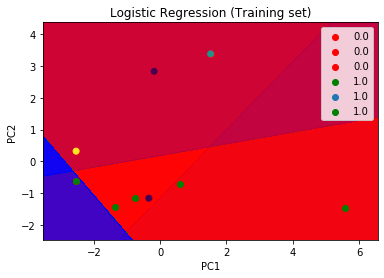

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set0 = X_train, y_train0
y_set1, y_set2 = y_train1, y_train2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier0.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set0 == j, 0], X_set[y_set0 == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
    plt.scatter(X_set[y_set1 == j, 0], X_set[y_set1 == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
    plt.scatter(X_set[y_set2 == j, 0], X_set[y_set2 == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

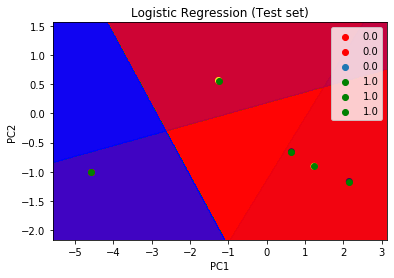

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set0 = X_test, y_test0
y_set1, y_set2 = y_test1, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier0.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set0 == j, 0], X_set[y_set0 == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
    plt.scatter(X_set[y_set1 == j, 0], X_set[y_set1 == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
    plt.scatter(X_set[y_set2 == j, 0], X_set[y_set2 == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## LDA 

In [0]:
y_train0 = y_train[:,0]
y_train1 = y_train[:,1]
y_train2 = y_train[:,2]

y_test0 = y_test[:,0]
y_test1 = y_test[:,1]
y_test2 = y_test[:,2]

Since LDA is based on supervised learning, unlike PCA, which is based on unsupervised learning, we need to pass y in the LDA function as well , when we apply it to the dataset. So, this implies that we need to apply LDA to each training set separately. Let's go.

### Training Set 1 

In [0]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train,y_train0) #Since it is a supervised model
X_test = lda.transform(X_test)

C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


So here is the drawback of LDA, they explained it themselves. The number of components that are supposed to be selected should be not be larger than min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components. So in our case, it should be either set to None or 1 components. Let's try with 1.

In [0]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda0 = LinearDiscriminantAnalysis(n_components = 1)
X_train = lda0.fit_transform(X_train,y_train0) #Since it is a supervised model
X_test = lda0.transform(X_test)

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier0= LogisticRegression(random_state = 0)
classifier0.fit(X_train, y_train0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred0 = classifier0.predict(X_test)

In [0]:
# if y_pred0 = (y_pred0 > 0.5), then the accuracy would have been..
print('Test accuracy {:.2f}%'.format(classifier0.score(X_test,y_test0)*100))

Test accuracy 60.00%


### Training Set 2

In [0]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis(n_components = 1)
X_train = lda1.fit_transform(X_train,y_train1) #Since it is a supervised model
X_test = lda1.transform(X_test)

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)

In [0]:
# if y_pred0 = (y_pred0 > 0.5), then the accuracy would have been..
print('Test accuracy {:.2f}%'.format(classifier1.score(X_test,y_test1)*100))

Test accuracy 20.00%


### Training Set 3

In [0]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda2 = LinearDiscriminantAnalysis(n_components = 1)
X_train = lda2.fit_transform(X_train,y_train2) #Since it is a supervised model
X_test = lda2.transform(X_test)

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier2= LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

In [0]:
# if y_pred0 = (y_pred0 > 0.5), then the accuracy would have been..
print('Test accuracy {:.2f}%'.format(classifier2.score(X_test,y_test2)*100))

Test accuracy 80.00%


### Combining and Reverse One-Hot Encoding the predictions

In [0]:
# y_pred = np.array([y_pred0.astype(int), y_pred1.astype(int), y_pred2.astype(int)])
y_pred = np.array([y_pred0, y_pred1, y_pred2])

In [0]:
y_pred

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [0]:
#Tranposing the y_pred so that it's shape remains same to that of y_test
y_pred = y_pred.transpose()

In [0]:
print(y_pred)

[[0. 1. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [0]:
#Printing a multilabel confusion matrix to check the results
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(y_test, y_pred)
print(cm)
print( skm.classification_report(y_test,y_pred))

[[[2 1]
  [1 1]]

 [[1 2]
  [2 0]]

 [[4 0]
  [1 0]]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1

   micro avg       0.25      0.20      0.22         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5
 samples avg       0.20      0.20      0.20         5



C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So, as we can see there are all zeroes present in the row of our first training example, this implies none of the values in the first example are above 0.5 . The machine might have predicted the greater one, and there must be a value of one of these categories higher than the others, but we can't know them , since lda rounded them off in its function. We can create our own lda with sigmoid, but since it is a tougher and longer process, and we already have a better solution, let's move ahead.

In [0]:
# Converting the y_pred numpy array to list , for convenience
y_pred_list = y_pred.tolist()
print(y_pred_list)

[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]]


In [0]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
# Creating a categorised array with zeroes by equating it with the the newly created list 
# And initalizing it to the index which has value 1.0  
y_pred_categorised = np.zeros(np.array(y_pred_list).shape[0])
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        if y_pred[i][j] == 1.0:
            y_pred_categorised[i] = j 

In [0]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
# Same process for y_test
y_test_list = y_test.tolist()
print(y_test_list)

[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]]


In [0]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
y_test_list

[[1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0]]

In [0]:
y_test_categorised = np.zeros(np.array(y_test_list).shape[0])
for i in range(len(y_test_list)):
    for j in range(len(y_test_list[i])):
        if y_test[i][j] == 1.0:
            y_test_categorised[i] = j 

In [0]:
y_test_categorised

array([0., 1., 1., 2., 0.])

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorised,y_pred_categorised)
print(cm)

[[1 1 0]
 [2 0 0]
 [0 1 0]]


In [0]:
print("Accuracy:",str(round((2+1)/(5)*100,2)), "%")

Accuracy: 60.0 %


So, we got 3/5 examples correct. That is still great, since we don't have much training examples. bringing more will make this model better at predicting the virality of the websites correctly.

So that marks the end of this notebook. In the next one, we will fit this data using Logistic Regression , Kernel SVM, Naive Bayes and other models, without fitting them to each category separately.